In [7]:
import pandas as pd
import itertools
import pandas as pd
import numpy as np
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [8]:
import os
os.chdir("F:/Fake_news_detection")

In [40]:
pwd

'F:\\Fake_news_detection'

In [9]:
dataframe = pd.read_csv('news.csv')
dataframe.head()

def data_check():
    dataframe.isnull().sum()
    dataframe.info()
    print("cheek is finished")


data_check()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  6335 non-null   int64 
 1   title       6335 non-null   object
 2   text        6335 non-null   object
 3   label       6335 non-null   object
dtypes: int64(1), object(3)
memory usage: 198.1+ KB
cheek is finished


In [10]:
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [11]:
dataframe.loc[(dataframe['label'] == 1), ['label']] = 'FAKE'
dataframe.loc[(dataframe['label'] == 0), ['label']] = 'REAL'
dataframe.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [12]:
# this mean you have 4 feature and 6335 rows
dataframe.shape

(6335, 4)

In [13]:
#isolate the labels
labels = dataframe.label
labels.head()



0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [15]:
x= dataframe['text']
y= dataframe['label']

In [17]:
x

0       Daniel Greenfield, a Shillman Journalism Fello...
1       Google Pinterest Digg Linkedin Reddit Stumbleu...
2       U.S. Secretary of State John F. Kerry said Mon...
3       — Kaydee King (@KaydeeKing) November 9, 2016 T...
4       It's primary day in New York and front-runners...
                              ...                        
6330    The State Department told the Republican Natio...
6331    The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...
6332     Anti-Trump Protesters Are Tools of the Oligar...
6333    ADDIS ABABA, Ethiopia —President Obama convene...
6334    Jeb Bush Is Suddenly Attacking Trump. Here's W...
Name: text, Length: 6335, dtype: object

In [18]:
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
#Split the dataset
# x [text] and y [label]
# x_train = text of data set and the labels in y_train
# x_text = text of data sset and the labels in y_test
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_train

2402    REAL
1922    REAL
3475    FAKE
6197    REAL
4748    FAKE
        ... 
4931    REAL
3264    REAL
1653    FAKE
2607    FAKE
2732    REAL
Name: label, Length: 5068, dtype: object

In [21]:
x_train.head(10)

2402    Christian Whiton is a former deputy special en...
1922    Super Tuesday Brings Harsh Light And Heartache...
3475    Prev post Page 1 of 4 Next \nNurses are among ...
6197    The deadly hostage situation at a luxury hotel...
4748    Our new country: Women and minorities hit hard...
780     Even if hackers don't strike on Election Day, ...
4734    By Jason Easley on Mon, Oct 31st, 2016 at 4:22...
265     I’m running on about an hour and a half of sle...
5421    For the moment, Mrs. Clinton may appear to be ...
402     advertisement - learn more It’s been more than...
Name: text, dtype: object

In [22]:
x_test.head(10)

3789    Watch the above reports by CBN's David Brody a...
733     — Bernie Sanders (@BernieSanders) October 27, ...
4783    \nAs of October 29, there have been at least 1...
3067    Members of Congress have said that if Hillary ...
5288    Julian Zelizer is a professor of history and p...
3388    Donald Trump announced his economic advisers o...
1328    Reinventing Democracy in America Starts by Vot...
2815    Nevada: Rep. Election Workers Intimidated Nove...
3417    Maggie Hassan, left and Kelly Ayotte Hassan de...
2472    Share This: BY NILE BOWIE T he outcome of stra...
Name: text, dtype: object

In [23]:
y_test.head(10)

3789    REAL
733     FAKE
4783    FAKE
3067    FAKE
5288    REAL
3388    REAL
1328    FAKE
2815    FAKE
3417    FAKE
2472    FAKE
Name: label, dtype: object

In [22]:
# before we train the model on our dataset , we will extract the feature form it , it means reducing the mass 
# of unstructured data into some uniform set of attributes that our model can understand it could be (bag of word)

# 1. we will start with simple bag of word technique
# 2. Building the count and Tf IDF vecotr
# 3. creating a feature vector document term matrix 
import sklearn
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer = CountVectorizer(stop_words='english')

In [23]:
# fit and Transform the traning data
# and return term-doucment frequency
# This is BaG OF WORD 
count_train = count_vectorizer.fit_transform(x_train)

In [25]:
print(count_vectorizer)

CountVectorizer(stop_words='english')

In [26]:
print(count_train)

  (0, 10921)	1
  (0, 59805)	1
  (0, 15532)	1
  (0, 51380)	1
  (0, 19070)	1
  (0, 26717)	1
  (0, 46698)	1
  (0, 38112)	1
  (0, 31088)	1
  (0, 23140)	2
  (0, 9088)	2
  (0, 2627)	1
  (0, 42770)	4
  (0, 24868)	1
  (0, 22021)	1
  (0, 42931)	1
  (0, 14609)	1
  (0, 2765)	1
  (0, 43557)	2
  (0, 42014)	2
  (0, 12711)	1
  (0, 5448)	1
  (0, 50674)	1
  (0, 42409)	1
  (0, 16188)	1
  :	:
  (5067, 8271)	1
  (5067, 12621)	1
  (5067, 59870)	1
  (5067, 27816)	7
  (5067, 40533)	1
  (5067, 44749)	1
  (5067, 52656)	1
  (5067, 12197)	1
  (5067, 22530)	1
  (5067, 46570)	1
  (5067, 57140)	1
  (5067, 43991)	1
  (5067, 21080)	1
  (5067, 24938)	1
  (5067, 34308)	1
  (5067, 58173)	1
  (5067, 37115)	1
  (5067, 20730)	1
  (5067, 23516)	2
  (5067, 56990)	1
  (5067, 42592)	1
  (5067, 58597)	2
  (5067, 28043)	1
  (5067, 32927)	1
  (5067, 14140)	1


In [28]:
# print Training Document term matrix
def get_count_Vectorzers_status():
#     vocablory size
    print(count_train.shape)
#     check vocablory 
    print(count_vectorizer.vocabulary_)
    
get_count_Vectorzers_status()

(5068, 61713)
{'christian': 10921, 'whiton': 59805, 'deputy': 15532, 'special': 51380, 'envoy': 19070, 'human': 26717, 'rights': 46698, 'north': 38112, 'korea': 31088, 'george': 23140, 'bush': 9088, 'administration': 2627, 'president': 42770, 'hamilton': 24868, 'foundation': 22021, 'principal': 42931, 'dc': 14609, 'advisory': 2765, 'public': 43557, 'policy': 42014, 'consultancy': 12711, 'author': 5448, 'smart': 50674, 'power': 42409, 'diplomacy': 16188, 'war': 59176, 'views': 58587, 'expressed': 20058, 'cnn': 11545, 'vladimir': 58792, 'putin': 43795, 'man': 33758, 'presidential': 42772, 'race': 44178, 'donald': 17075, 'trump': 56179, 'thursday': 54974, 'russian': 47481, 'reportedly': 45947, 'declared': 14815, 'absolute': 2143, 'leader': 31855, 'natural': 37206, 'brawny': 8386, 'showman': 49843, 'posed': 42268, 'fishing': 21297, 'shirtless': 49683, 'shooting': 49744, 'horseback': 26502, 'riding': 46660, 'said': 47694, 'lively': 32676, 'talented': 53891, 'doubt': 17209, 'did': 16011, 'em

In [29]:
# Transform the Test set 
count_test = count_vectorizer.transform(x_test)

In [24]:
#Initialize a TfidfVectorizer
# this remove words which appear in more than 70% of the article 
#max_df =0.7 means ignore terms that appear in more than 70 % of documnets
tfvect = TfidfVectorizer(stop_words='english',max_df=0.7)

In [26]:
# Fit & transform train set, transform test set
# fit and transform the traing data
tfid_x_train = tfvect.fit_transform(x_train)


tfid_x_test = tfvect.transform(x_test)


In [39]:
def get_tfidf_status():
    tfid_x_train.shape
#     get train data feature data
    print(tfid_x_train.A[:10])
    
get_tfidf_status()    
    

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.05239028 0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.07204465 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [27]:
import matplotlib.pyplot as plt
from sklearn import metrics

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
# About PassiveAgressiveClassifier - https://www.geeksforgeeks.org/passive-aggressive-classifiers/
# Initialize the PassiveAggressiveClassifier and fit training sets
classifier = PassiveAggressiveClassifier(max_iter=50)
classifier.fit(tfid_x_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

Accuracy: 93.53%
Confusion matrix, without normalization


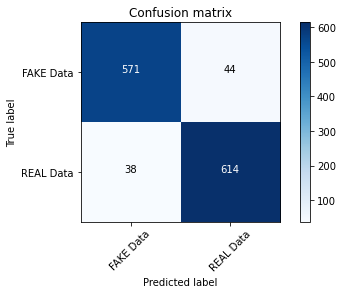

In [30]:
#Predict and calculate accuracy
y_pred = classifier.predict(tfid_x_test)
score = accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')
cm = metrics.confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

In [31]:
# Build confusion matrix
cf = confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])
print(cf)


[[571  44]
 [ 38 614]]


In [39]:
def fake_news_det(news):
    input_data = [news]
    vectorized_input_data = tfvect.transform(input_data)
    prediction = classifier.predict(vectorized_input_data)
    print(prediction)

In [40]:
fake_news_det('U.S. Secretary of State John F. Kerry said Monday that he will stop in Paris later this week, amid criticism that no top American officials attended Sundayâ€™s unity march against terrorism.')

['REAL']


In [41]:
import pickle
#saving the model into disk
model_file = 'final_model.sav'
pickle.dump()


TypeError: dump() missing required argument 'obj' (pos 1)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = ['This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
     'Is this the first document?',
 ]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

In [2]:
print(vectorizer.get_feature_names())

['and', 'document', 'first', 'is', 'one', 'second', 'the', 'third', 'this']
